In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('eda_data.csv')
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python,r_studio,spark,aws,excel,job_sim,seniority,descri_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,50,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,39,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,13,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,58,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,25,1,0,0,0,1,data scientist,na,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,193,0,0,0,1,0,na,senior,6162,3
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,17,1,0,1,1,0,data engineer,senior,6130,3
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,39,0,0,0,0,1,na,na,3078,0
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,-1,0,0,0,0,1,manager,na,1642,0


`choose relavent columns`

`Get dummy data`

`Train-Test split`

`Multiple linear regration`

`lasso regression`

`RandomForest`

`Tune model GridSearchcv`

`Test ensembles`

### Choose relavent Columns

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provider', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'HC_same_state', 'age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'job_sim', 'seniority',
       'descri_len', 'num_comp'],
      dtype='object')

In [4]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue',
             'num_comp','hourly','employer_provider','job_state', 'HC_same_state',
              'age', 'python','spark', 'aws', 'excel', 'job_sim', 'seniority',
              'descri_len']]
df_model

,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,num_comp,hourly,employer_provider,job_state,HC_same_state,age,python,spark,aws,excel,job_sim,seniority,descri_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,50,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,39,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,13,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,58,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,25,1,0,0,1,data scientist,na,2728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),3,0,0,MA,0,193,0,0,1,0,na,senior,6162
738,102.5,4.4,1001 to 5000 employees,Company - Public,Internet,Information Technology,$100 to $500 million (USD),3,0,0,TN,0,17,1,1,1,0,data engineer,senior,6130
739,73.5,2.6,501 to 1000 employees,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,0,0,PA,1,39,0,0,0,1,na,na,3078
740,127.5,3.2,1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,0,0,PA,0,-1,0,0,0,1,manager,na,1642


In [5]:
df_dum = pd.get_dummies(df_model)
df_dum

,avg_salary,Rating,num_comp,hourly,employer_provider,HC_same_state,age,python,spark,aws,...,job_sim_analyst,job_sim_data engineer,job_sim_data scientist,job_sim_director,job_sim_manager,job_sim_mle,job_sim_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,50,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,39,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,13,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,58,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,25,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,3,0,0,0,193,0,0,1,...,0,0,0,0,0,0,1,0,0,1
738,102.5,4.4,3,0,0,0,17,1,1,1,...,0,1,0,0,0,0,0,0,0,1
739,73.5,2.6,0,0,0,1,39,0,0,0,...,0,0,0,0,0,0,1,0,1,0
740,127.5,3.2,0,0,0,0,-1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


`Train-Test split`


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df_dum.drop('avg_salary',axis=1)
y = df_dum['avg_salary']
 

In [8]:
xtrain,xtest,ytrain,ytest =train_test_split(X,y,train_size=0.2,random_state=42)

### Building models

`Multiple linear regration`



In [9]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.15
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           3.19e-94
Time:                        11:46:07   Log-Likelihood:                -3311.1
No. Observations:                 742   AIC:                             6910.
Df Residuals:                     598   BIC:                             7574.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                44.4444      6.734      6.600      0.000      31.219      57.670
Rating                                                3.5895      1.938      1.852      0.064      -0.216       7.395
num_comp                                              2.3533      0.875      2.690      0.007       0.635       4.072
hourly                                              -36.4227      9.175     -3.970      0.000     -54.442     -18.403
employer_provider                                    31.4034     11.526      2.725      0.007       8.768      54.039
HC_same_state                                         2.6744      2.627      1.018      0.309      -2.484       7.833
age                                                   0.0338      0.030      1.127      0.260      -0.025       0.093
python                                                8.0546      2.525      3.190      0.001       3.095      13.014
spark                                                -0.4951      2.922     -0.169      0.866      -6.234       5.243
aws                                                   1.1146      2.736      0.407      0.684      -4.259       6.488
excel                                                -0.4985      2.270     -0.220      0.826      -4.957       3.960
descri_len                                           -0.0002      0.001     -0.235      0.814      -0.002       0.001
Size_-1                                              13.6733      8.630      1.584      0.114      -3.276      30.623
Size_1 to 50 employees                                1.2860      6.503      0.198      0.843     -11.485      14.057
Size_10000+ employees                                -3.0702      5.805     -0.529      0.597     -14.471       8.331
Size_1001 to 5000 employees                           6.1542      3.880      1.586      0.113      -1.466      13.774
Size_201 to 500 employees                             2.4869      3.879      0.641      0.522      -5.131      10.104
Size_5001 to 10000 employees                         -3.8859      5.444     -0.714      0.476     -14.577       6.805
Size_501 to 1000 employees                            2.3613      4.063      0.581      0.561      -5.617      10.340
Size_51 to 200 employees                              4.3972      4.425      0.994      0.321      -4.293      13.087
Size_Unknown                                         21.0416     13.995      1.503      0.133      -6.444      48.527
Type of ownership_-1                                 13.6733      8.630      1.584      0.114      -3.276      30.623
Type of ownership_College / University                6.4860     17.739      0.366      0.715     -28.352      41.324
Type of ownersh

In [10]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [11]:
np.mean(cross_val_score(lr,xtrain,ytrain,scoring='neg_mean_absolute_error',cv = 3))

-695.1375621285205

`lasso regression`

In [12]:
lm_l = Lasso(alpha=0.77)
lm_l.fit(xtrain,ytrain)
np.mean(cross_val_score(lm_l,xtrain,ytrain, scoring = 'neg_mean_absolute_error', cv= 3))

-23.199367040454234

In [13]:
alpha = []
error= []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,xtrain,ytrain, scoring = 'neg_mean_absolute_error', cv= 3)))

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.031e+03, tolerance: 1.547e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.667e+03, tolerance: 1.345e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

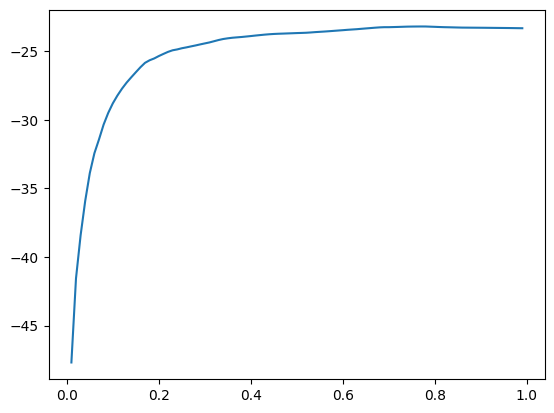

In [14]:
plt.plot(alpha,error)

In [15]:
err = tuple(zip(alpha,error)) 

In [16]:
df_err = pd.DataFrame(err,columns=['alpha','error'])


In [17]:
df_err[df_err.error == max(df_err.error)]

,alpha,error
76,0.77,-23.199367


`RandomForest`

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,xtrain,ytrain,scoring = 'neg_mean_absolute_error', cv= 3))

-22.31996666666667

`Tune model GridSearchcv`


In [19]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':range(10,300,10), 'criterion':('mse','absolute_error'), 'max_features':('auto','sqrt','log2')}

gs =GridSearchCV(rf,parameter,scoring='neg_mean_absolute_error',cv=3)
gs.fit(xtrain,ytrain)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [20]:
gs.best_score_

-21.613628117913834

In [21]:
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='auto',
                      n_estimators=30)

### Test ensembles

In [22]:
tpred_lm = lr.predict(xtest)
tpred_lml = lm_l.predict(xtest)
tpred_rf = gs.best_estimator_.predict(xtest)

In [24]:
from sklearn.metrics import mean_absolute_error,r2_score
print(mean_absolute_error(ytest,tpred_lm))
print(mean_absolute_error(ytest,tpred_lml))
print(mean_absolute_error(ytest,tpred_rf))

print(r2_score(ytest,tpred_lm))
print(r2_score(ytest,tpred_lml))
print(r2_score(ytest,tpred_rf))

32.24918267051977
21.47491297941813
21.08740179573513
-0.2604830351867673
0.4518431892215805
0.4401402866157792


In [25]:
mean_absolute_error(ytest,(tpred_lm+tpred_rf)/2)

23.19871684842682